# Importing Data & libraries

In [0]:
from google.colab import files
uploaded = files.upload()


Saving house-votes-84.data to house-votes-84.data


In [0]:

import io
import time
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, SelectPercentile
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split  # Pour diviser nos données en trainset et testset. 
from sklearn.tree import DecisionTreeClassifier # Créer le modèle DecisionTreeClassifier 
from sklearn.metrics import accuracy_score # Calculer le score du modèle 
from sklearn import tree
import random
from sklearn.linear_model import LinearRegression  
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline
headers=[" Class Name","handicapped-infants","water-project-cost-sharing","adoption-of-the-budget-resolution","physician-fee-freeze",
         "el-salvador-aid","religious-groups-in-schools","anti-satellite-test-ban","aid-to-nicaraguan-contra","mx-missile","immigration"
        ,"synfuels-corporation-cutback","education-spending","superfund-right-to-sue","crime","duty-free-exports","export-administration-act-south-africa"]
data=pd.read_csv(io.BytesIO(uploaded['house-votes-84.data']),names=headers)


# Exploring Data :




In [0]:

np.shape(data)

(435, 17)

In [0]:
data.isnull().sum()

In [0]:
data.head(5)

In [0]:
variable_map ={'y':1,'n':0,'?':None}
dataRep = data.replace(variable_map)
dataRep.head(5)

In [0]:
dataRep.isnull().sum()

 Class Name                                 0
handicapped-infants                        12
water-project-cost-sharing                 48
adoption-of-the-budget-resolution          11
physician-fee-freeze                       11
el-salvador-aid                            15
religious-groups-in-schools                11
anti-satellite-test-ban                    14
aid-to-nicaraguan-contra                   15
mx-missile                                 22
immigration                                 7
synfuels-corporation-cutback               21
education-spending                         31
superfund-right-to-sue                     25
crime                                      17
duty-free-exports                          28
export-administration-act-south-africa    104
dtype: int64

In [0]:

variable_map ={'republican':0,'democrat':1}
datanew = dataRep.replace(variable_map)
datanew.head(5)

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contra,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,1,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,1,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


#Removing the null values

In [0]:
dataFinal=datanew.dropna(axis=0,how='any')
dataFinal.isnull().sum()


 Class Name                               0
handicapped-infants                       0
water-project-cost-sharing                0
adoption-of-the-budget-resolution         0
physician-fee-freeze                      0
el-salvador-aid                           0
religious-groups-in-schools               0
anti-satellite-test-ban                   0
aid-to-nicaraguan-contra                  0
mx-missile                                0
immigration                               0
synfuels-corporation-cutback              0
education-spending                        0
superfund-right-to-sue                    0
crime                                     0
duty-free-exports                         0
export-administration-act-south-africa    0
dtype: int64

In [0]:
dataFinal.head(5)

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contra,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
5,0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
8,1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
19,0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
23,0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
25,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [0]:
np.shape(dataFinal)

(232, 17)

#Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
#Deviser X et Y
X = dataFinal.values[:, 1:17]
Y = dataFinal.values[:, 0]
df1 = dataFinal.drop([' Class Name'], axis=1)
df1_names=df1 .columns

# Diviser les données en données d'entrainement et données de tests (Fait dans le TP02 )
## Décider de la taille des données pour chaque set
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.1)

print(X_train.shape)
print(X_test.shape)

# Créer le modèle 
model = LogisticRegression(solver="lbfgs")

# Entraîner le modèle 
model.fit(X_train, y_train)

# Prédire les classes 
predicted_classes = model.predict(X_test)

# Calculer le score du modèle 
accuracy = accuracy_score(y_test.flatten(),predicted_classes)

print(accuracy)
#df1_names

(208, 16)
(24, 16)
0.9166666666666666


(208, 15)
(24, 15)
accuracy :0.9166666666666666

#Filter Feature Selection

Filter methods are generally used as a preprocessing step. The selection of features is independent of any machine learning algorithms. Instead, features are selected on the basis of their scores in various statistical tests for their correlation with the outcome variable. The correlation is a subjective term here,so the filter methods are the type of methods where individual features are ranked according to specific criteria

here ,we will present two filter selection methods :Fisher Score and Mutual Information


#1 - Fisher Score
Fisher score is one of the most widely used supervised feature selection methods. However,
it selects each feature independently according to their scores under the Fisher criterion,
which leads to a suboptimal subset of features.The key idea of Fisher score is to find a subset of features, such that in the data space spanned by the selected features, the distances between data points in different classes are as large as possible, while the distances between data points in the same class are as small as possible.

RESULTS:
Number of chosen features : 5
the new accuracy 0.875
time :0.0020780563354492188 



In [0]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)
X_train.shape, y_train.shape, X_test.shape, y_test.shape


#Fischer Score: Chi Square
#In this notebook, we'll compute the chi-squared stats between each non negative feature and the target class(Class Name).
#This score should be used to evaluate categorical variables in a classification task
# Calcualte the Fisher Score (chi2) between each feature and target
start = time.time()
fisher_score = chi2(X_train, y_train)
end = time.time()
print("Taken Time :")
print(end - start)

#Two arrays are returned: F scores and P value. More the P value, more difference between the distributions.
p_values = pd.Series(fisher_score[1])
p_values.index = df1_names
p_values.sort_values(ascending=False)
p_values




Taken Time :
0.0026445388793945312


handicapped-infants                       9.566445e-05
water-project-cost-sharing                9.605940e-01
adoption-of-the-budget-resolution         7.737620e-12
physician-fee-freeze                      2.782312e-22
el-salvador-aid                           1.684894e-13
religious-groups-in-schools               1.044094e-04
anti-satellite-test-ban                   1.142324e-06
aid-to-nicaraguan-contra                  6.957732e-12
mx-missile                                3.630723e-11
immigration                               7.401810e-01
synfuels-corporation-cutback              2.412286e-05
education-spending                        1.139246e-14
superfund-right-to-sue                    3.898599e-08
crime                                     6.999596e-09
duty-free-exports                         3.018875e-09
export-administration-act-south-africa    3.766353e-02
dtype: float64

In [0]:
fisher_score

(array([1.79304354e+01, 1.15794239e-02, 4.21998913e+01, 9.49787573e+01,
        5.31117155e+01, 1.31765280e+01, 2.24507527e+01, 4.24516644e+01,
        4.22754759e+01, 3.36983120e-01, 1.92172452e+01, 5.83918784e+01,
        2.87271501e+01, 3.20011311e+01, 3.11837546e+01, 4.54042114e+00]),
 array([2.29127574e-05, 9.14306864e-01, 8.24045995e-11, 1.92439273e-22,
        3.15107463e-13, 2.83477487e-04, 2.15600991e-06, 7.24507319e-11,
        7.92805049e-11, 5.61575820e-01, 1.16654788e-05, 2.14775809e-14,
        8.33272978e-08, 1.54082834e-08, 2.34722180e-08, 3.31034467e-02]))

In [0]:
#Smaller the p_value, more significant the feature is to predict the target value,so we choose features that maximize the lower bound of traditional Fisher score
#Deviser les nouveaux X et Y

df2 = dataFinal[[' Class Name','religious-groups-in-schools','el-salvador-aid','anti-satellite-test-ban','education-spending']]
X = df2.values[:, 1:5]
Y = df2.values[:, 0]
#calculer la nouvelle accuracy
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.1)

print(X_train.shape)
print(X_test.shape)

# Créer le modèle 
model = LogisticRegression(solver="lbfgs")

# Entraîner le modèle 
model.fit(X_train, y_train)

# Prédire les classes 
predicted_classes = model.predict(X_test)

# Calculer le score du modèle 
accuracy = accuracy_score(y_test.flatten(),predicted_classes)

print(accuracy)

(208, 4)
(24, 4)
0.875


# 2 - Mutual Information (using Classification)
Mutual Information measures how much information the presence/absence of a feature contributes to making the correct prediction on target Y. It measures how much knowing about one variable reduces the uncertainity about the other.
**Two Steps:**
Rank features based on certain criteria/metric.
Select features with highest ranking.

RESULTS:
Number of chosen features : 
the new accuracy :0.875
time 0.10727643966674805


In [0]:
X = dataFinal.drop([' Class Name'], axis=1)
Y= dataFinal[' Class Name']
X.head()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contra,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
5,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
8,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
19,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
23,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
25,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


Taken Time :
0.10513806343078613
Selected top 8 features: Index(['adoption-of-the-budget-resolution', 'physician-fee-freeze',
       'el-salvador-aid', 'aid-to-nicaraguan-contra', 'mx-missile',
       'education-spending', 'crime', 'duty-free-exports'],
      dtype='object')


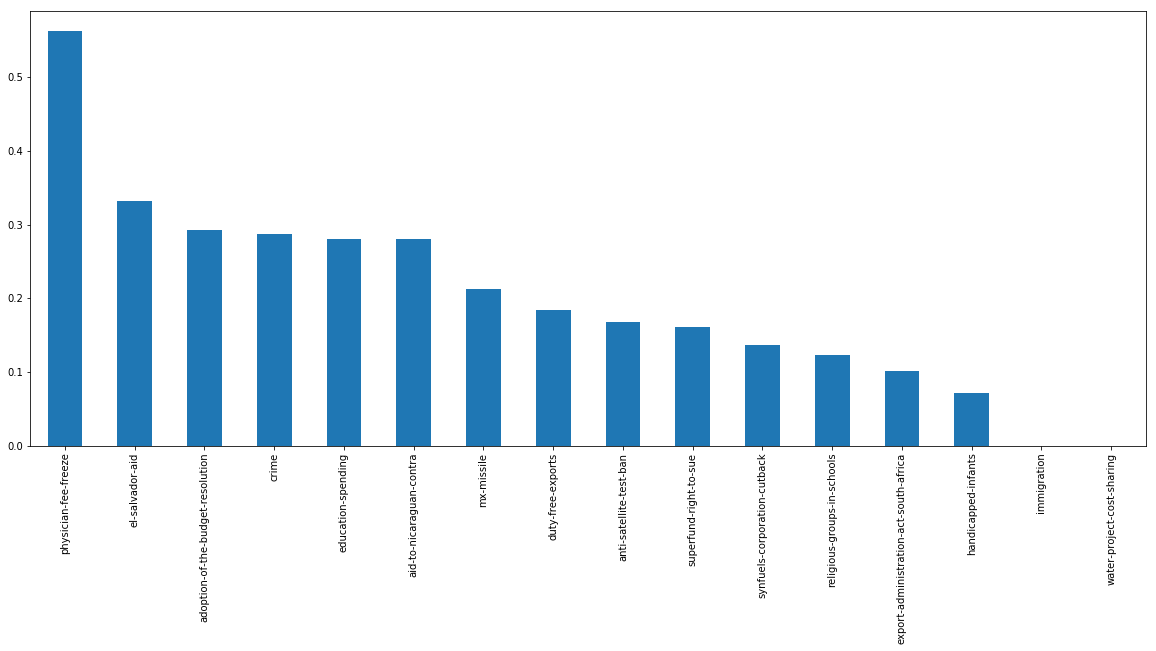

In [0]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)
X_train.shape, y_train.shape, X_test.shape, y_test.shape 
# Calculate Mutual Information between each feature and the target
start = time.time()
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info
# Create Feature Target Mutual Information Series
mi_series = pd.Series(mutual_info)
mi_series.index = X_train.columns
mi_series.sort_values(ascending=False)
# Select K best features
k_best_features = SelectKBest(mutual_info_classif, k=8).fit(X_train, y_train)
end = time.time()
print("Taken Time :")
print(end - start)
print('Selected top 6 features: {}'.format(X_train.columns[k_best_features.get_support()]))
mi_series.sort_values(ascending=False).plot.bar(figsize=(20,8))


As we can see in the plot from left to right, the features which have the most amount of mutual information is on the left and the features with the least amount of mutual information are on the right. Some of the features contribute a lot to the mutual information whereas some of them do not contribute anything. So, to select the important features from this list, we can set a threshold like maybe select the first 2 percentile of features or first 5 features etc.

To do this we used a combination of "SelectKbest" or "SelectPercentile".

In [0]:
#Deviser les nouveaux X et Y

df3 = dataFinal[[' Class Name','adoption-of-the-budget-resolution', 'physician-fee-freeze',
       'el-salvador-aid', 'aid-to-nicaraguan-contra', 'mx-missile',
       'education-spending']]
X = df3.values[:, 1:6]
Y = df3.values[:, 0]
#calculer la nouvelle accuracy
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.1)

print(X_train.shape)
print(X_test.shape)

# Créer le modèle 
model = LogisticRegression(solver="lbfgs")

# Entraîner le modèle 
model.fit(X_train, y_train)

# Prédire les classes 
predicted_classes = model.predict(X_test)

# Calculer le score du modèle 
accuracy = accuracy_score(y_test.flatten(),predicted_classes)

print(accuracy)
